# Simple decision tree on Iris dataset


Install pydot with

        conda install -c anaconda pydot

ou avec

        pip install pydot


http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.datasets import load_iris


import pydot
from IPython.display import Image

%matplotlib inline



In [ ]:
# Load the data and fit the model

iris = load_iris()
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
iris.data

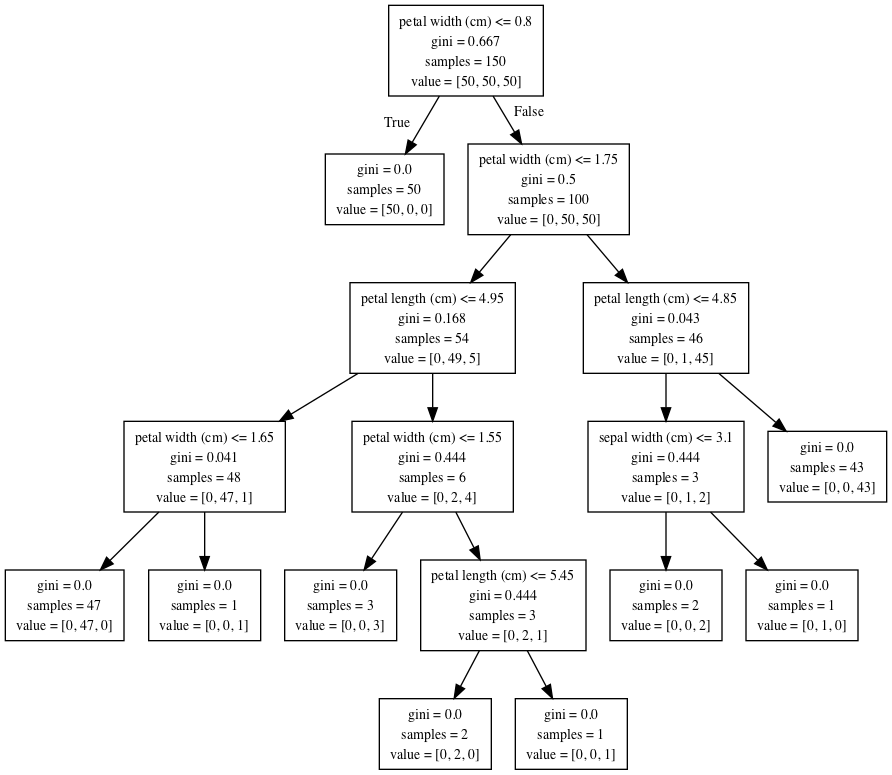

In [4]:
# Plot the tree
def visualize_tree():
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
    graph = pydot.graph_from_dot_data(dot_data.getvalue())

    return Image(graph[0].create_png())

    
visualize_tree()    


# Un modele "Parfait"


In [5]:
yhat= clf.predict(iris.data)
print("\n-- Classification Report \n")
print(classification_report( yhat, iris.target ))
print("\n-- Confusion Matrix \n")
print(confusion_matrix( yhat, iris.target ))



-- Classification Report 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150


-- Confusion Matrix 

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


# Experiment with tree parameters


http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

* max_depth
* min_samples_split
* min_samples_leaf

Split data into train and test and let's see what happens


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
    test_size=0.5,
    random_state=2)


# Arbre non contraint

In [11]:
# arbre non contraint

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
yhat= clf.predict(X_test)


print("\n-- Classification Report \n")
print(classification_report( yhat, y_test ))

print("\n-- Confusion Matrix \n")
print(confusion_matrix( yhat, y_test ))



-- Classification Report 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       1.00      0.88      0.94        26
          2       0.88      1.00      0.94        22

avg / total       0.96      0.96      0.96        75


-- Confusion Matrix 

[[27  0  0]
 [ 0 23  3]
 [ 0  0 22]]


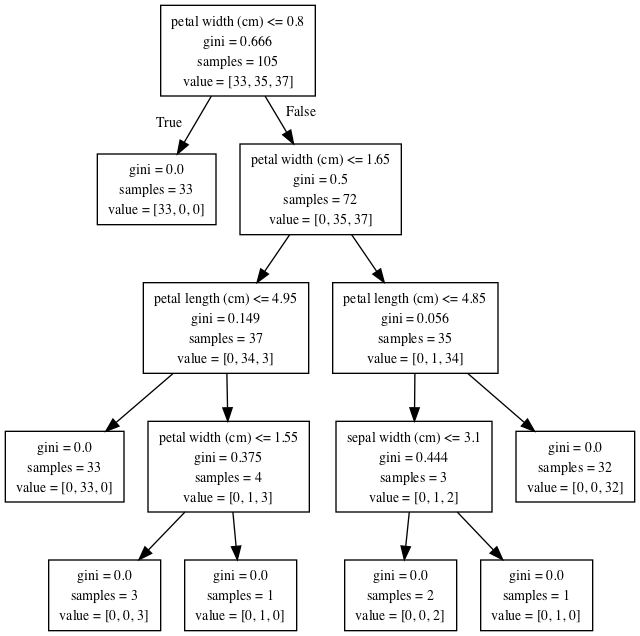

In [9]:
visualize_tree()    

# Pruned tree max_depth = 2

In [12]:
# 
clf = DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)
yhat= clf.predict(X_test)


print("\n-- Classification Report \n")
print(classification_report( yhat, y_test ))
print("\n-- Confusion Matrix \n")
print(confusion_matrix( yhat, y_test ))



-- Classification Report 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       1.00      0.85      0.92        27
          2       0.84      1.00      0.91        21

avg / total       0.96      0.95      0.95        75


-- Confusion Matrix 

[[27  0  0]
 [ 0 23  4]
 [ 0  0 21]]


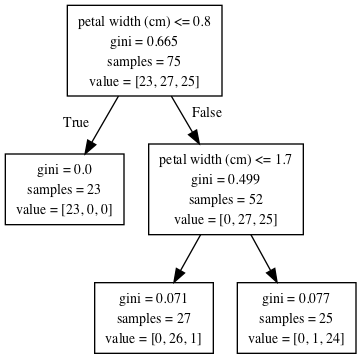

In [13]:
visualize_tree()

# min_samples_leaf

In [14]:
clf = DecisionTreeClassifier(min_samples_leaf = 10)
clf = clf.fit(X_train, y_train)
yhat= clf.predict(X_test)


print("\n-- Classification Report \n")
print(classification_report( yhat, y_test ))
print("\n-- Confusion Matrix \n")
print(confusion_matrix( yhat, y_test ))



-- Classification Report 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       1.00      0.85      0.92        27
          2       0.84      1.00      0.91        21

avg / total       0.96      0.95      0.95        75


-- Confusion Matrix 

[[27  0  0]
 [ 0 23  4]
 [ 0  0 21]]


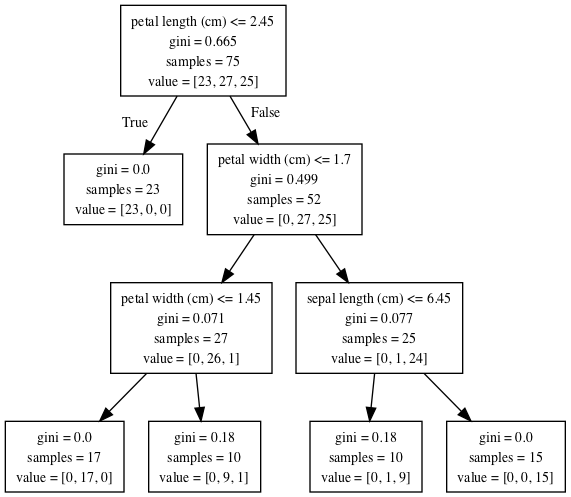

In [15]:
visualize_tree()